In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Work/ML/Algorithms/Logistic Regression/ex2data1.csv') 

In [ ]:
dataset

,X,Y,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
dataset.shape

(100, 3)

In [ ]:
dataset.describe()

,X,Y,Result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [ ]:
X.shape

(100, 2)

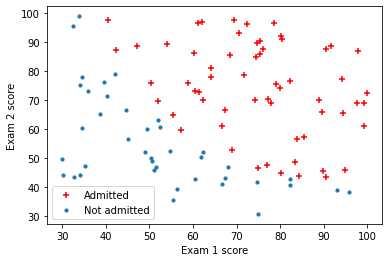

In [ ]:
pos , neg = (Y==1).reshape(100,1) , (Y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0) 

In [ ]:
# Hypothesis Function
def sigmoid(p):
  return (1 / (1+np.exp(-p)))

In [ ]:
sigmoid(0)

0.5

In [ ]:
# feature normalization
def featurenormalization(X):
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  X_norm = (X-mean) / std
  return X_norm, mean, std

In [ ]:
# define cost function
def costfunction(theta, X, Y):
  m = len(Y)
  diff = 0
  predict = []
  for i in range(m):
    predict_value = sigmoid(np.dot(X[i], theta)) 
    predict.append(predict_value) 
    diff = diff + (-Y[i]*np.log(predict_value)) - ((1-Y[i])*np.log(1-predict_value))
    
  cost = (1/m)*diff
  grad = (1/m)*np.dot(X.transpose(),(np.array(predict)-Y))
  return cost, grad 

In [ ]:
# gradient descent
def gradientdescent(theta,X, Y, alpha, num_iters):
  cost_value = []
  for i in range(num_iters):
    cost, grad = costfunction(theta, X, Y)
    theta = theta-(alpha*grad)
    cost_value.append(cost)
  return theta, cost_value 

In [ ]:
# feature normalization block
m, n = X.shape[0], X.shape[1]
X, X_mean, X_std = featurenormalization(X)
X = np.append(np.ones((m,1)),X,axis=1)
Y = Y.reshape(m,1) 

pd.DataFrame(X).describe()

,0,1,2
count,100.0,1.000000e+02,1.000000e+02
mean,1.0,4.907186e-16,1.554312e-17
std,0.0,1.005038e+00,1.005038e+00
min,1.0,-1.838026e+00,-1.926416e+00
25%,1.0,-7.605496e-01,-9.758328e-01
50%,1.0,7.172855e-02,7.898388e-02
75%,1.0,7.524658e-01,7.105930e-01
max,1.0,1.765618e+00,1.765716e+00


In [ ]:
# training process
initial_theta = np.zeros((n+1,1))
cost, grad = costfunction(initial_theta, X, Y)

In [ ]:
alpha = 0.55
num_iters = 500
theta, cost_values = gradientdescent(initial_theta, X, Y, alpha, num_iters)

Text(0.5, 1.0, 'cost function curve')

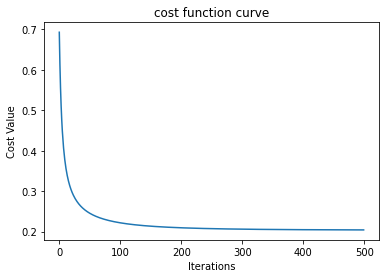

In [ ]:
plt.plot(cost_values)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.title("cost function curve") 

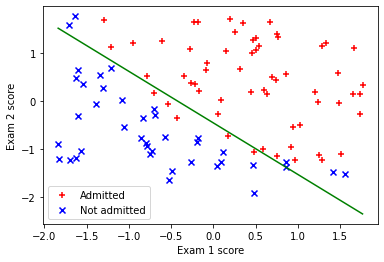

In [ ]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]

plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)